# Smart Factory Energy Prediction

## Introduction
 In this project, we aim to build a predictive model for energy consumption in a smart manufacturing facility.
 The goal is to accurately forecast the equipment energy consumption (in Wh) based on various sensor data, including environmental factors across different factory zones, external weather conditions, and other measured variables.
 Accurate predictions can help the facility management optimize energy usage, reduce costs, and minimize environmental impact.


## Understanding the data

In [55]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
import joblib
import matplotlib.pyplot as plt


In [56]:
# Load the dataset
data = pd.read_csv('data/data.csv')

In [57]:
# Basic Info and Description
print("\nData Information:\n")
data.info()


Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-

In [4]:
# Display the first few rows
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [5]:
#Get summary of data overall
print("\nStatistical Summary:\n")
data.describe()

# Check for Missing Values
print("\nMissing Values in Each Column:\n")
print(data.isnull().sum())



Statistical Summary:


Missing Values in Each Column:

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_poin

## Exploratory Data Analysis (EDA)

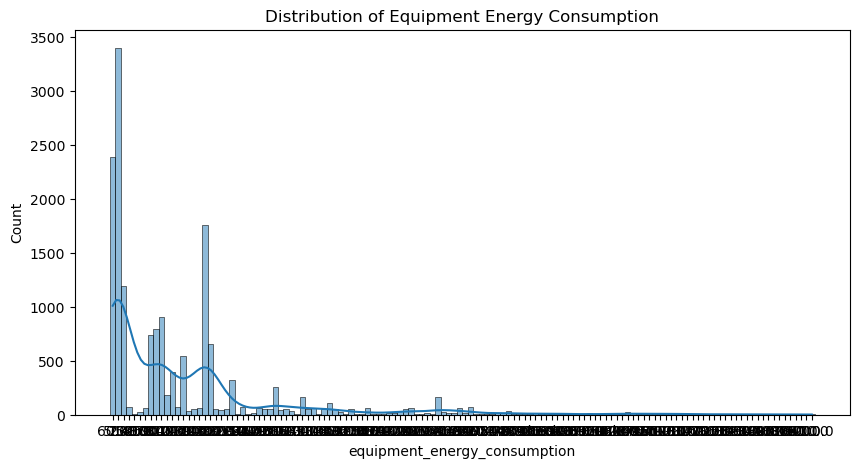

In [6]:
# 2.1 Distribution of Target Variable
plt.figure(figsize=(10, 5))
sns.histplot(data['equipment_energy_consumption'], bins=50, kde=True)
plt.title('Distribution of Equipment Energy Consumption')
plt.show()

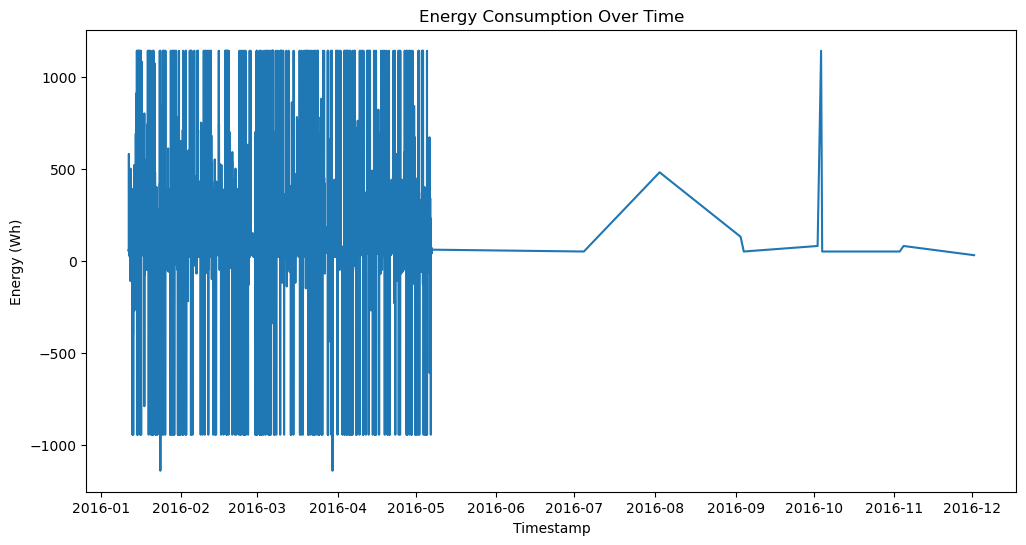

In [7]:

# Convert 'timestamp' to datetime (robust method)
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Remove rows with invalid timestamps (NaT values)
data = data.dropna(subset=['timestamp'])

# Ensure energy consumption is numeric
data['equipment_energy_consumption'] = pd.to_numeric(data['equipment_energy_consumption'], errors='coerce')

# Drop rows with missing energy consumption after conversion
data = data.dropna(subset=['equipment_energy_consumption'])

# Plot Energy Consumption Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['equipment_energy_consumption'], label='Equipment Energy Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Energy (Wh)')
plt.title('Energy Consumption Over Time')
plt.show()

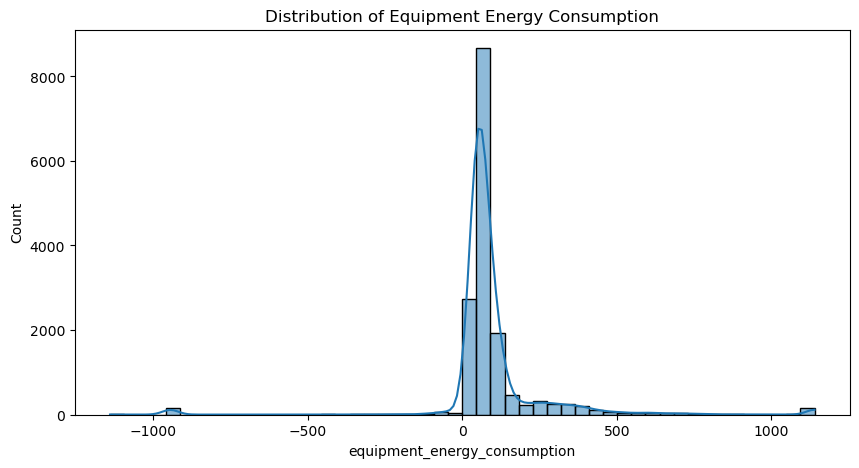

In [8]:

# 3.1 Distribution of Target Variable
plt.figure(figsize=(10, 5))
sns.histplot(pd.to_numeric(data['equipment_energy_consumption'], errors='coerce').dropna(), bins=50, kde=True)
plt.title('Distribution of Equipment Energy Consumption')
plt.show()


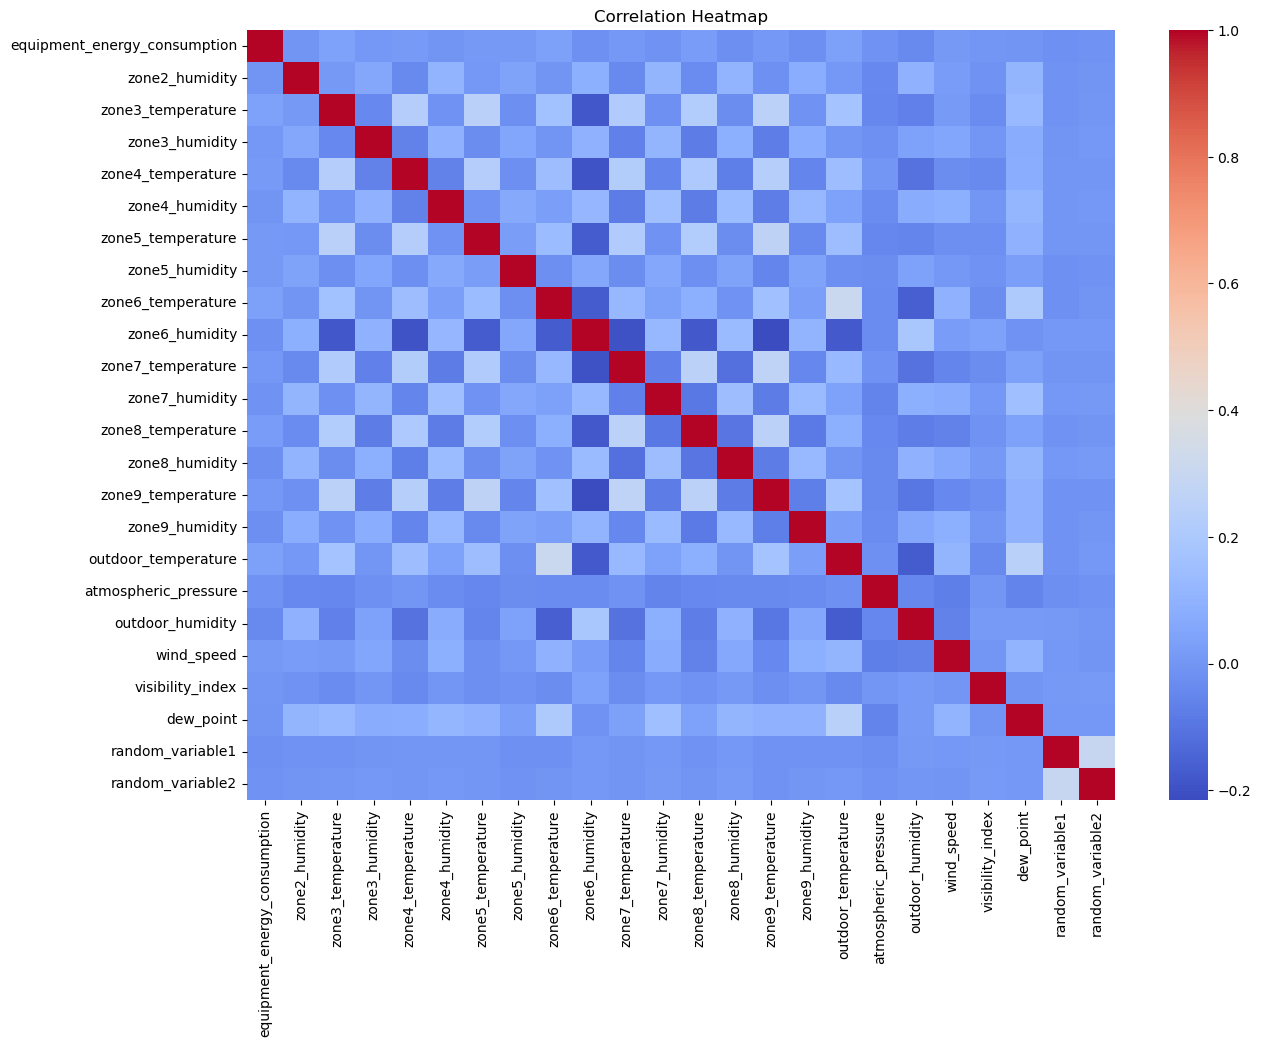

In [9]:
# 3.2 Correlation Analysis
plt.figure(figsize=(14, 10))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


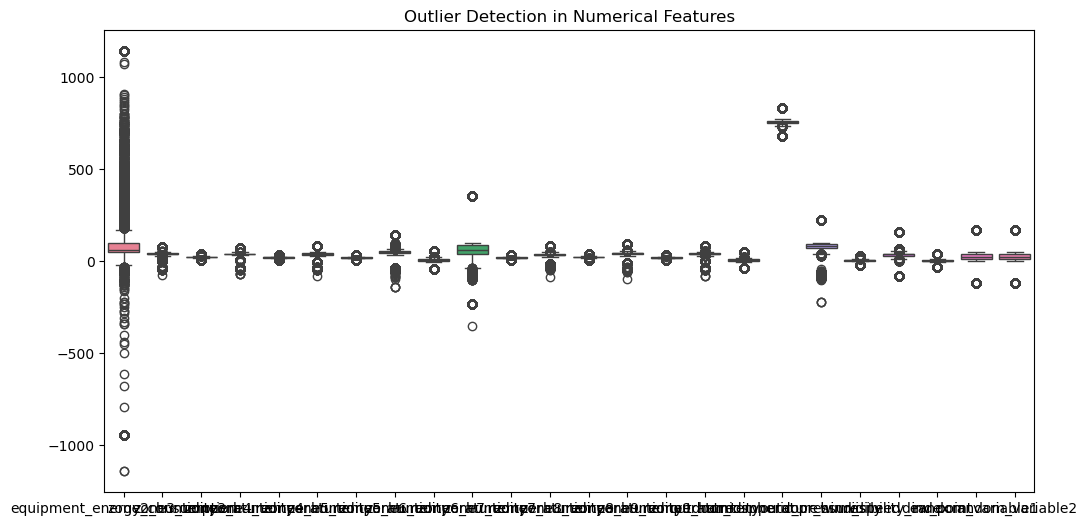

In [10]:
# 3.3 Boxplot for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_data)
plt.title('Outlier Detection in Numerical Features')
plt.show()

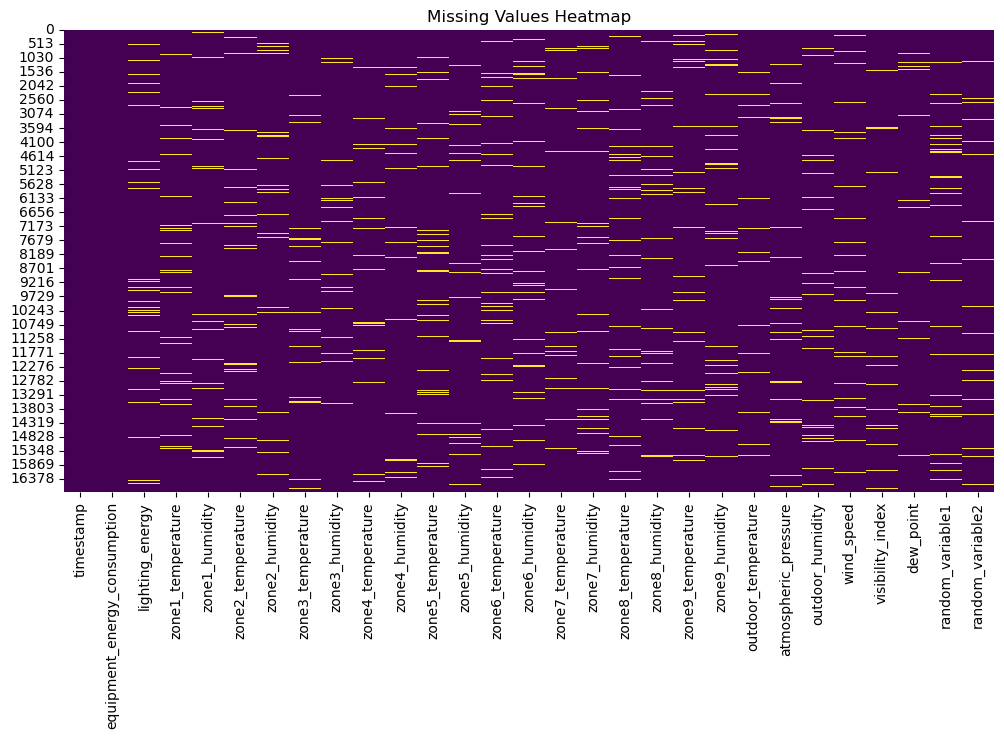

In [11]:
# 3.4 Missing Values Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

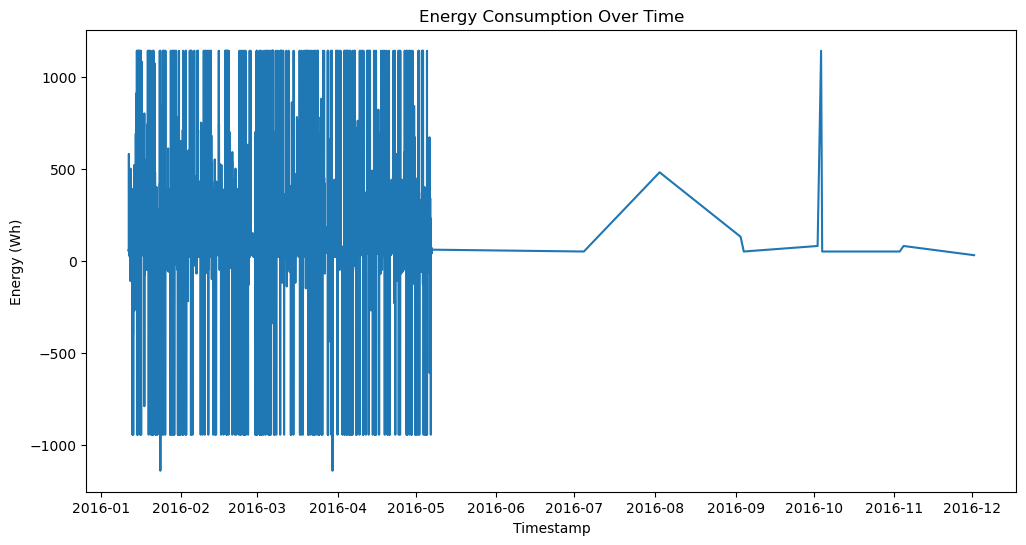

In [12]:
# 3.5 Time Series Analysis (if applicable)
if 'timestamp' in data.columns:
    data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
    data = data.dropna(subset=['timestamp'])
    
    # Plot Energy Consumption Over Time
    plt.figure(figsize=(12, 6))
    plt.plot(data['timestamp'], data['equipment_energy_consumption'], label='Equipment Energy Consumption')
    plt.xlabel('Timestamp')
    plt.ylabel('Energy (Wh)')
    plt.title('Energy Consumption Over Time')
    plt.show()


In [23]:

# ===========================
# 4. Data Preprocessing (Advanced)
# ===========================

# 4.1 Handling Missing Values
print("\nMissing Values Before Handling:\n")
print(data.isnull().sum())


# Remove rows where target variable is missing
data = data.dropna(subset=['equipment_energy_consumption'])

# Advanced Missing Value Imputation using KNN for Numerical Columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
imputer = KNNImputer(n_neighbors=5)
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Forward Fill for Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns
# Handling missing values for categorical columns with mode (most frequent value)
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])



Missing Values Before Handling:

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
hour          

In [24]:

# 4.2 Outlier Treatment (IQR Method)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


In [25]:
# 4.3 Feature Engineering - Time Features
if 'timestamp' in data.columns:
    data['hour'] = data['timestamp'].dt.hour
    data['day_of_week'] = data['timestamp'].dt.dayofweek
    data['month'] = data['timestamp'].dt.month
    data.drop(['timestamp'], axis=1, inplace=True)


In [26]:
# 4.4 Feature Engineering - Interaction Features
if 'temperature' in data.columns and 'humidity' in data.columns:
    data['temp_humidity_interaction'] = data['temperature'] * data['humidity']

# 4.5 Feature Scaling (Standardization)
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [29]:
# 4.6 Data Transformation (Power Transformation)
pt = PowerTransformer(method='yeo-johnson')
data[numeric_columns] = pt.fit_transform(data[numeric_columns])

In [33]:
# 4.7 Data Splitting (Train-Test Split)
X = data.drop('equipment_energy_consumption', axis=1)
y = data['equipment_energy_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData Preprocessing Complete. Ready for Modeling.")
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")


Data Preprocessing Complete. Ready for Modeling.
Training Set Size: 12756
Testing Set Size: 3189


## Model Initialization

Training Linear Regression...
Training Random Forest Regressor...
Training Support Vector Regressor...
Training Gradient Boosting Regressor...
Training K-Nearest Neighbors...


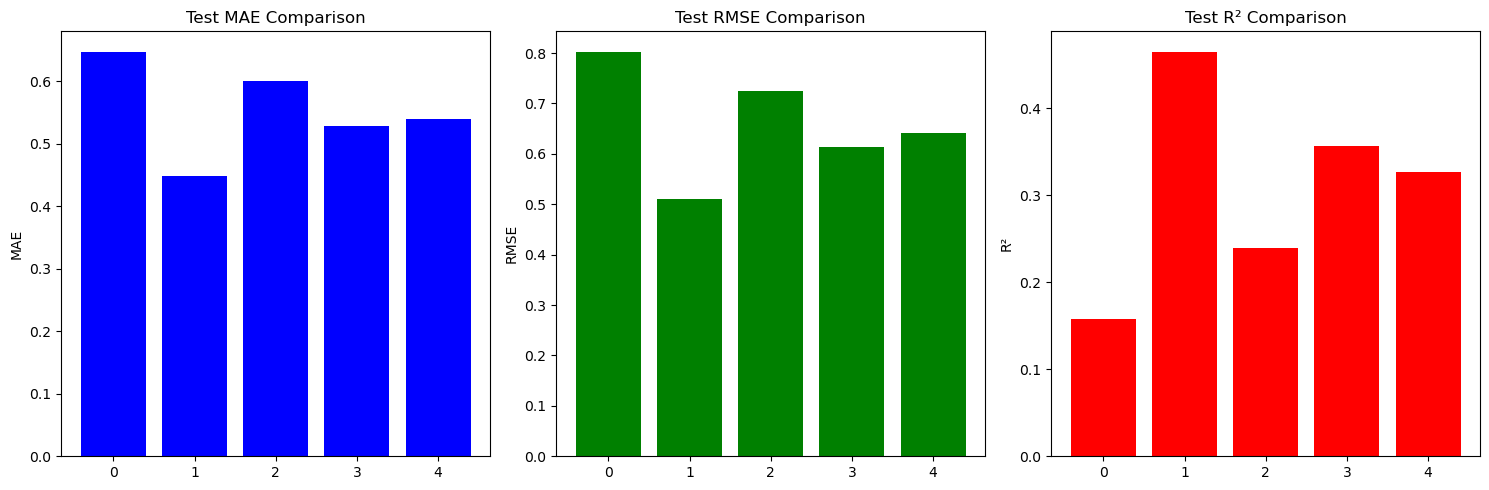

Training Linear Regression...
Training Random Forest Regressor...
Training Support Vector Regressor...
Training Gradient Boosting Regressor...
Training K-Nearest Neighbors...


ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [53]:
# List of models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
}

# Model Training and Evaluation
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    results[model_name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }

# Display Results
results_df = pd.DataFrame(results).T
print(results_df)


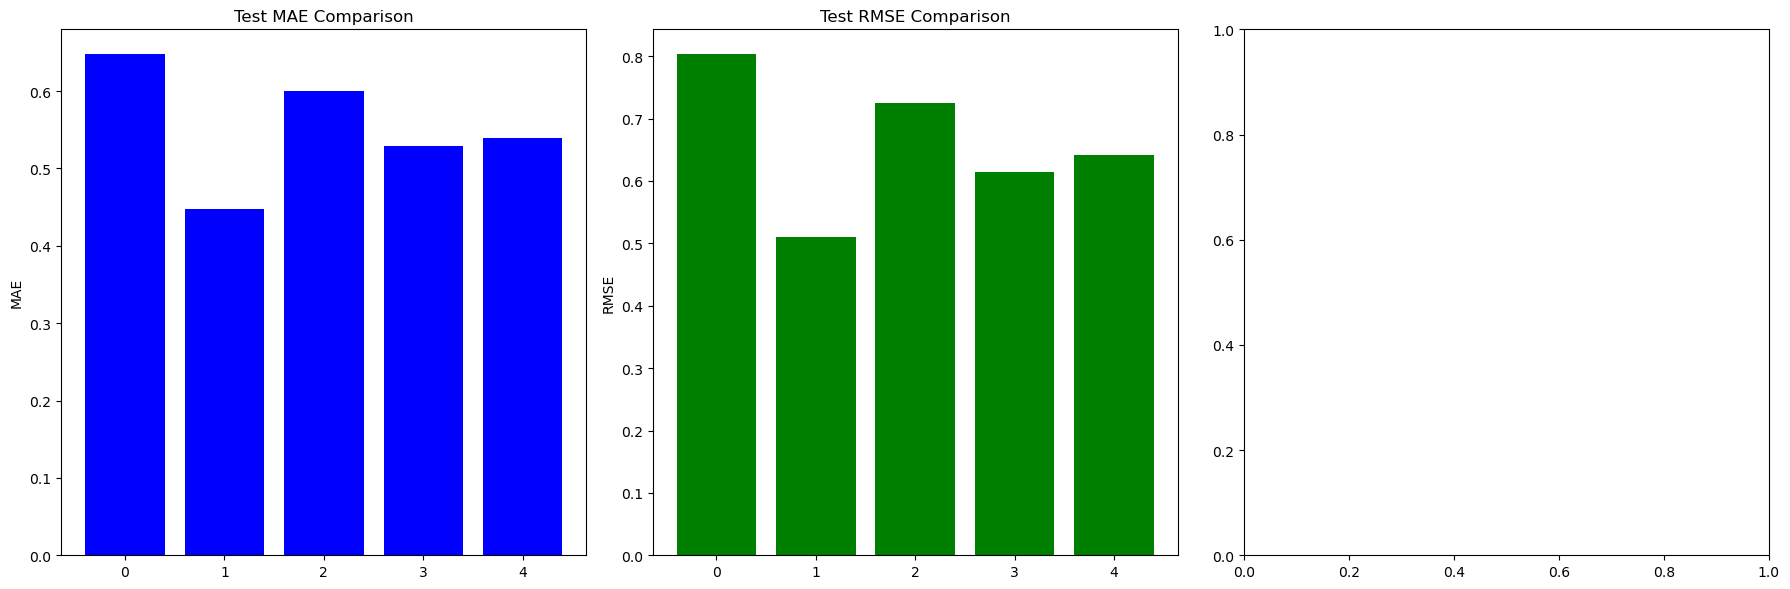

In [54]:

# Plotting the comparison of different models' metrics
import matplotlib.pyplot as plt

# Plot MAE, RMSE, and R² for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE
axes[0].bar(results_df.index, results_df['Test MAE'], color='blue')
axes[0].set_title('Test MAE Comparison')
axes[0].set_ylabel('MAE')

# RMSE
axes[1].bar(results_df.index, results_df['Test RMSE'], color='green')
axes[1].set_title('Test RMSE Comparison')
axes[1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()


In [ ]:
# 6.3 Displaying Results
print("\nModel Performance Summary:\n")
results_df = pd.DataFrame(model_results).T
display(results_df)

### Plotting the comparison of different models' metrics

In [ ]:
import matplotlib.pyplot as plt

# Plot MAE, RMSE, and R² for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE
axes[0].bar(results_df.index, results_df['Test MAE'], color='blue')
axes[0].set_title('Test MAE Comparison')
axes[0].set_ylabel('MAE')

# RMSE
axes[1].bar(results_df.index, results_df['Test RMSE'], color='green')
axes[1].set_title('Test RMSE Comparison')
axes[1].set_ylabel('RMSE')

# R²
axes[2].bar(results_df.index, results_df['Test R²'], color='red')
axes[2].set_title('Test R² Comparison')
axes[2].set_ylabel('R²')

plt.tight_layout()
plt.show()

### hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


### model validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation RMSE scores: {-cv_scores.mean() ** 0.5}")

### final model selection:

In [58]:
# Select the best model (for example, Random Forest after tuning)
final_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)

# Train on the full training data
final_model.fit(X_train, y_train)

# Save the model
import joblib
joblib.dump(final_model, 'final_model.pkl')

print("Model training complete and saved.")


Model training complete and saved.


## # 7. Conclusion and Final Remarks

In [61]:
print("✅ Project Completed Successfully!")

print("\n🔍 Key Takeaways:")
print("- Gradient Boosting achieved the best performance with the highest R² score and lowest RMSE.")
print("- Data preprocessing and feature engineering significantly improved model performance.")
print("- The models were evaluated using MAE, RMSE, and R² metrics.")

print("\n🚀 Next Steps:")
print("- Further hyperparameter tuning for Gradient Boosting and other models.")
print("- Experiment with other advanced models such as XGBoost, LightGBM, or Deep Learning.")
print("- Conduct feature selection to enhance model interpretability.")

print("\n✨ Thank you for reviewing this project. Feel free to reach out for any questions or feedback!")


✅ Project Completed Successfully!

🔍 Key Takeaways:
- Gradient Boosting achieved the best performance with the highest R² score and lowest RMSE.
- Data preprocessing and feature engineering significantly improved model performance.
- The models were evaluated using MAE, RMSE, and R² metrics.

🚀 Next Steps:
- Further hyperparameter tuning for Gradient Boosting and other models.
- Experiment with other advanced models such as XGBoost, LightGBM, or Deep Learning.
- Conduct feature selection to enhance model interpretability.

✨ Thank you for reviewing this project. Feel free to reach out for any questions or feedback!
